# Credit Card Default Classification

# <font color='red'>Step 1 Classification using Gradient Descent and `spicy` function</font>

###  <font color='blue'>1.1 Download the data </font>

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
# Define X and Y
df = pd.read_excel('DataDefault.xlsx') 
df.head()

,AGE,INCOME,DEFAULT
0,30.250000,9.986667,1
1,29.583334,10.000000,1
2,33.000000,10.400000,1
3,42.416668,11.666667,0
4,37.250000,12.500000,1


###  <font color='blue'>1.2 Plot the data </font>

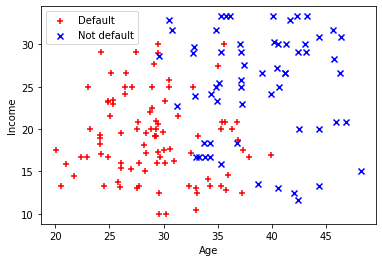

In [3]:
# Define X and Y 
X = df.drop('DEFAULT',axis=1).values
Y = df['DEFAULT'].values

# Separate to default and no-default
pos, neg = Y==1, Y==0
plt.scatter(X[pos,0], X[pos,1], c="r", marker="+")
plt.scatter(X[neg,0], X[neg,1], c="b",marker="x")

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(['Default', 'Not default'], loc=2)

###  <font color='blue'>1.3 Write functions for sigmoid, cost function, hypothesis function and gradient descent  </font>

In [4]:
def sigmoid(z):    
    g = 1 / (1 + np.exp(-z))
    return g

In [5]:
def costFunction(theta, X, y):  
    J = (1 / len(y)) * np.sum(-y.dot(np.log(sigmoid(X @ theta))) - (1 - y).dot(np.log(1 - sigmoid(X @ theta))))
    return J

In [6]:
def hypothesis(X,theta): 
    h = sigmoid(X @ theta)
    return h

In [7]:
def gradient_descent( X, y, theta, alpha, num_iters):
    
    m = len(X[0])
    J_history =[]
    
    for i in range(num_iters):   
        theta = theta - (alpha/m) * np.dot(X.transpose(), (sigmoid(X @ theta) - y) )  
        J_history.append(costFunction(theta, X, y))
        
    return theta, J_history

###  <font color='blue'>1.4 Report the cost for a theta of zeros  </font>

In [9]:
# Initialize fitting parameters
m = len(Y)
X = np.concatenate([np.ones((m, 1)), X], axis=1)
initial_theta = np.zeros((X.shape[1], 1))

# Compute and display initial cost and gradient for logistic regression
cost = costFunction(initial_theta, X, Y)

In [10]:
print("Cost at initial theta (zeros):", cost)

Cost at initial theta (zeros): 0.6931471805599453


###  <font color='blue'>1.5 Find solutions using gradient descent  </font>

In [11]:
initial_theta = -1*np.ones(X.shape[1])
alpha=0.0001
iterations=1000000
theta, J_history = gradient_descent(X, Y, initial_theta, alpha, iterations)

In [12]:
print('Theta is', '\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta) )
print('The cost function is', J_history[10000-1])

Theta is 	[20.725, -0.466, -0.212]
The cost function is 0.5511721436911953


Text(0.5, 1.0, 'Cost function using Gradient Descent')

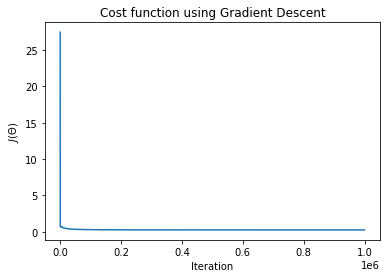

In [13]:
# plot cost function
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

###  <font color='blue'>1.6 Find solutions using spicy built-in function  </font>

In [14]:
theta_0 = [(1),(0),(1)]
res = minimize(costFunction, theta_0 ,(X, Y))
print('Theta is', '\t[{:.3f}, {:.3f}, {:.3f}]'.format(*res.x) )
print('The cost function is', res.fun)

Theta is 	[21.217, -0.478, -0.217]
The cost function is 0.2637072640976708


###  <font color='blue'>1.7 Compare results </font>

In [15]:
print('Theta from gradient descent is', '\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))

Theta from gradient descent is 	[20.725, -0.466, -0.212]


In [16]:
print('Theta from spicy function is', '\t[{:.3f}, {:.3f}, {:.3f}]'.format(*res.x))

Theta from spicy function is 	[21.217, -0.478, -0.217]


In [17]:
print('The cost from gradient descent is', cost)

The cost from gradient descent is 0.6931471805599453


In [18]:
print('The cost from spicy function is', res.fun)

The cost from spicy function is 0.2637072640976708


So coefficients estimated from both methods are fairly comparable, with the spicy built-in function generates smaller cost value than the gradient method does.

###  <font color='blue'>1.8 Plot the decision boundary </font>

In [19]:
def mapFeaturePlot(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out

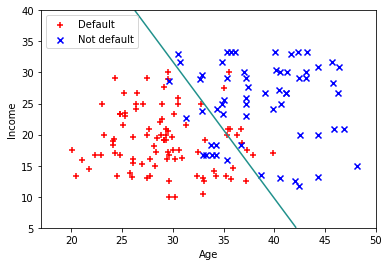

In [20]:
X = df.drop('DEFAULT',axis=1).values
Y = df['DEFAULT'].values

plt.scatter(X[pos,0], X[pos,1], c="r",marker="+",label="Admitted")
plt.scatter(X[neg,0], X[neg,1], c="b",marker="x",label="Not admitted")

# Plotting decision boundary

u_vals = np.linspace(17,50,10)
v_vals= np.linspace(5,40,10)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],1) @ theta 

plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(['Default', 'Not default'], loc=2)

# <font color='red'>Step 2: Classification using `scikit-learn`</font>

In [21]:
# libraries
from sklearn.linear_model import LogisticRegression

In [22]:
# Define X and Y
X = df.drop('DEFAULT',axis=1).values
Y = df['DEFAULT'].values

In [23]:
model = LogisticRegression(solver='lbfgs', random_state=0).fit(X, Y)

In [24]:
print('coefficients: ',model.coef_)
print('intercept :', model.intercept_)

coefficients:  [[-0.47395046 -0.21563025]]
intercept : [21.05876572]


The coefficients $\mathbf{\theta}$ generated from the LogsticRegression function are similiar with the ones computed using the gradient descent method and the spicy built-in function.

# <font color='red'>Step 3: Features Mapping</font>

###  <font color='blue'>3.1 Download the data and visualize</font>

In [25]:
# Define X and Y
df = pd.read_excel('DataDefault.xlsx') 
df.head()

,AGE,INCOME,DEFAULT
0,30.250000,9.986667,1
1,29.583334,10.000000,1
2,33.000000,10.400000,1
3,42.416668,11.666667,0
4,37.250000,12.500000,1


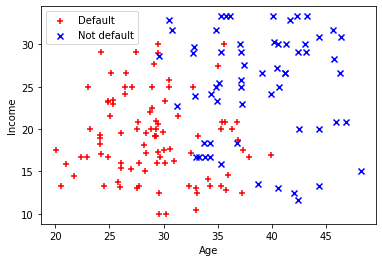

In [26]:
# Define X and Y 
X = df.drop('DEFAULT',axis=1).values
Y = df['DEFAULT'].values

# Separate to default and no-default
pos, neg = Y==1, Y==0
plt.scatter(X[pos,0], X[pos,1], c="r", marker="+")
plt.scatter(X[neg,0], X[neg,1], c="b",marker="x")

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(['Default', 'Not default'], loc=2)

###  <font color='blue'>3.2 Map the features into higher degrees </font>

In [27]:
def power(X,power):
    X_power = []
    for i in range(1,power+1):
        X_power = np.power(X,i)
        if i == 1:
            X_new = X_power
        else:
            X_new = np.concatenate((X_new, X_power), axis = 1)
    return X_new

In [28]:
X_new = pd.DataFrame(power(X,6), 
                     columns=['Age', 'Income',
                             'Age_degree2', 'Income_degree2',
                             'Age_degree3', 'Income_degree3',
                             'Age_degree4', 'Income_degree4',
                             'Age_degree5', 'Income_degree5',
                             'Age_degree6', 'Income_degree6'])

XY = pd.DataFrame(pd.concat((pd.DataFrame(Y, columns=['DEFAULT']), pd.DataFrame(X_new)), axis = 1))
XY.head()

,DEFAULT,Age,Income,Age_degree2,Income_degree2,Age_degree3,Income_degree3,Age_degree4,Income_degree4,Age_degree5,Income_degree5,Age_degree6,Income_degree6
0,1,30.250000,9.986667,915.062500,99.733511,27680.640625,996.005331,8.373394e+05,9946.77324,2.532952e+07,99335.108759,7.662179e+08,9.920266e+05
1,1,29.583334,10.000000,875.173651,100.000000,25890.554412,1000.000000,7.659289e+05,10000.00000,2.265873e+07,100000.000000,6.703208e+08,1.000000e+06
2,1,33.000000,10.400000,1089.000000,108.160000,35937.000000,1124.864000,1.185921e+06,11698.58560,3.913539e+07,121665.290240,1.291468e+09,1.265319e+06
3,0,42.416668,11.666667,1799.173716,136.111111,76314.953995,1587.962963,3.237026e+06,18526.23457,1.373039e+08,216139.403323,5.823972e+09,2.521626e+06
4,1,37.250000,12.500000,1387.562500,156.250000,51686.703125,1953.125000,1.925330e+06,24414.06250,7.171853e+07,305175.781250,2.671515e+09,3.814697e+06


###  <font color='blue'>3.3 Divide the data into training (60%), cross validation (20%) and test (20%) set </font>

In [29]:
train, validate, test = np.split(XY.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])

In [30]:
train.shape

(92, 13)

In [31]:
validate.shape

(31, 13)

In [32]:
test.shape

(31, 13)

###  <font color='blue'>3.4 Compute the cost of logistic regression on the training and CV samples</font>

In [33]:
def sigmoid(z):    
    g = 1 / (1 + np.exp(-z))
    return g

In [34]:
def CostFunctionLogistic(X, Y, degree):
    cost = []
    J = []
    m = len(Y)
    for i in range(1, degree+1):
        # degree of X
        X_degree = pd.DataFrame(X).iloc[:,0:2*i]
        # logistic regression
        log = LogisticRegression(solver='lbfgs', random_state=0).fit(X_degree, Y)
        theta = np.concatenate([log.intercept_*np.ones((1, 1)),log.coef_],axis=1)
        # include a constant
        X = np.concatenate([np.ones((m, 1)), X_degree], axis=1)
        # compute cost
        J = (1 / len(Y)) * np.sum(Y.dot(np.log(sigmoid(X @ theta.T))) - (1 - Y).dot(np.log(1 - sigmoid(X @ theta.T))))
        # append cost
        cost.append(J)
    return cost

#### Training subsamples

In [35]:
X_train = train.drop('DEFAULT',axis=1)
Y_train = train['DEFAULT']

In [36]:
cost_train = pd.DataFrame(CostFunctionLogistic(X_train, Y_train, 6), columns = ['cost'])
cost_train['degree'] = cost_train.index + 1
cost_train = cost_train.reindex(columns=['degree', 'cost'])
cost_train

,degree,cost
0,1,0.016188
1,2,0.016188
2,3,0.016184
3,4,0.016184
4,5,0.016184
5,6,0.016185


#### CV subsamples

In [37]:
X_validate = validate.drop('DEFAULT',axis=1)
Y_validate = validate['DEFAULT']

In [38]:
cost_validate = pd.DataFrame(CostFunctionLogistic(X_validate, Y_validate, 6), columns = ['cost'])
cost_validate['degree'] = cost_validate.index + 1
cost_validate = cost_validate.reindex(columns=['degree', 'cost'])
cost_validate

,degree,cost
0,1,0.020589
1,2,0.020589
2,3,0.020589
3,4,0.020589
4,5,0.020590
5,6,0.020589


###  <font color='blue'>3.5 Plot the cost </font>

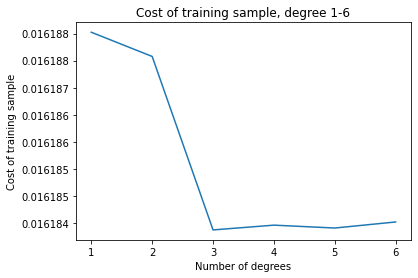

In [39]:
import matplotlib.ticker as mtick

plt.plot(cost_train['degree'], cost_train['cost'])
plt.xlabel('Number of degrees')
plt.ylabel('Cost of training sample')
plt.title('Cost of training sample, degree 1-6')

plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.6f'))

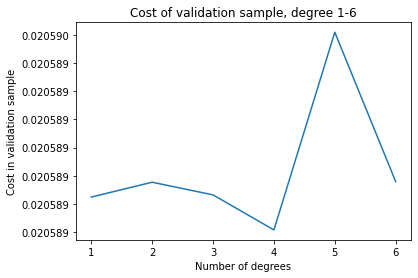

In [40]:
plt.plot(cost_validate['degree'], cost_validate['cost'])
plt.xlabel('Number of degrees')
plt.ylabel('Cost in validation sample')
plt.title('Cost of validation sample, degree 1-6')

plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.6f'))

###  <font color='blue'>3.6 Prediction over test set and report confusion matrix </font>

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

#### Minimize the cost of the training subsamples - degree 3

In [42]:
X_test = test.drop('DEFAULT',axis=1)
Y_test = test['DEFAULT']

In [43]:
cost_test = pd.DataFrame(CostFunctionLogistic(X_test, Y_test, 3), columns = ['cost'])
cost_test['degree'] = cost_test.index + 1
cost_test = cost_test.reindex(columns=['degree', 'cost'])
cost_test = cost_test.iloc[-1:]
cost_test

,degree,cost
2,3,-0.006312


In [44]:
logistic_d3 = LogisticRegression(solver='lbfgs', random_state=0).fit(X_train.iloc[:,0:2*3], Y_train)
pred_d3 = logistic_d3.predict(X_test.iloc[:,0:2*3])
pred_d3

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1])

In [45]:
d3_matrix = metrics.confusion_matrix(Y_test,pred_d3)
d3_matrix

array([[ 9,  2],
       [ 1, 19]])

Text(0.5, 257.44, 'Predicted label')

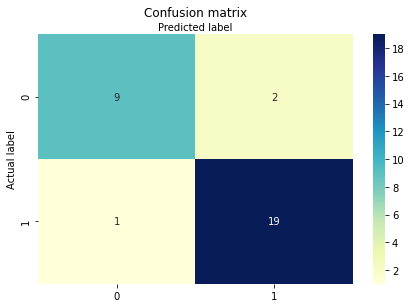

In [46]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(d3_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
print("Accuracy:",metrics.accuracy_score(Y_test,pred_d3))
print("Precision:",metrics.precision_score(Y_test,pred_d3))
print("Recall:",metrics.recall_score(Y_test,pred_d3))

Accuracy: 0.9032258064516129
Precision: 0.9047619047619048
Recall: 0.95


#### Minimize the cost of the validation subsamples - degree 4

In [48]:
X_test = test.drop('DEFAULT',axis=1)
Y_test = test['DEFAULT']

In [49]:
cost_test = pd.DataFrame(CostFunctionLogistic(X_test, Y_test, 4), columns = ['cost'])
cost_test['degree'] = cost_test.index + 1
cost_test = cost_test.reindex(columns=['degree', 'cost'])
cost_test = cost_test.iloc[-1:]
cost_test

,degree,cost
3,4,-0.006313


In [50]:
logistic_d4 = LogisticRegression(solver='lbfgs', random_state=0).fit(X_train.iloc[:,0:2*4], Y_train)
pred_d4 = logistic_d4.predict(X_test.iloc[:,0:2*4])
pred_d4

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1])

In [51]:
d4_matrix = metrics.confusion_matrix(Y_test,pred_d4)
d4_matrix

array([[ 8,  3],
       [ 4, 16]])

Text(0.5, 257.44, 'Predicted label')

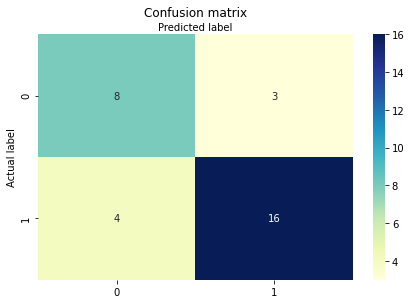

In [52]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(d4_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [53]:
print("Accuracy:",metrics.accuracy_score(Y_test,pred_d4))
print("Precision:",metrics.precision_score(Y_test,pred_d4))
print("Recall:",metrics.recall_score(Y_test,pred_d4))

Accuracy: 0.7741935483870968
Precision: 0.8421052631578947
Recall: 0.8


Compared the above two models, the model with degree = 3 performs better on the test set as it has a higher accuracy, higher precision and higher recall ratios. 

###  <font color='blue'>3.7 Cross validation with 5 folds </font>

In [54]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

In [55]:
# Define X and Y 
X = df.drop('DEFAULT',axis=1).values
Y = df['DEFAULT'].values

In [56]:
reg = LogisticRegression()
parameters = {'penalty':['l2'] , 'C' : np.linspace(1,20,50)}
tune_GSCV = GridSearchCV(reg, parameters, cv=5).fit(X, Y)
print('Best parameters are: ', tune_GSCV.best_params_)
print('Best score are: ', tune_GSCV.best_score_)

Best parameters are:  {'C': 1.0, 'penalty': 'l2'}
Best score are:  0.8182795698924732


In [57]:
reg = LogisticRegression(C = 1, penalty='l2').fit(X, Y)
y_pre = reg.predict(X)

In [58]:
cv_matrix = metrics.confusion_matrix(Y,y_pre)
cv_matrix

array([[51, 10],
       [11, 82]])

Text(0.5, 257.44, 'Predicted label')

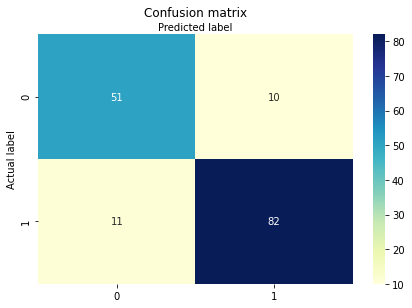

In [59]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cv_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [60]:
print("Accuracy:",metrics.accuracy_score(Y,y_pre))
print("Precision:",metrics.precision_score(Y,y_pre))
print("Recall:",metrics.recall_score(Y,y_pre))

Accuracy: 0.8636363636363636
Precision: 0.8913043478260869
Recall: 0.8817204301075269
